In [2]:
import pandas as pd
import sqlite3
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as plticker
from imblearn.over_sampling import SMOTE
%matplotlib inline
# Importing required libraries
import sklearn
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

from sklearn import metrics 
from sklearn.metrics import f1_score
# Models
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression 
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [3]:
conn = sqlite3.connect('all.db')

query = "SELECT * FROM spotify_songs"
df = pd.read_sql_query(query, conn)
query = "SELECT * FROM user_songs"
df_fav= pd.read_sql_query(query, conn)

conn.close()

In [4]:
df.head()

,track_id,length,popularity,danceability,acousticness,energy,instrumentalness,liveness,loudness,speechiness,tempo,time_signature,favorite
0,7x9aauaA9cu6tyfpHnqDLo,184400,98,0.802,0.31100,0.832,0.000000,0.0815,-4.107,0.0434,124.997,4,0
1,2IGMVunIBsBLtEQyoI1Mu7,231750,100,0.868,0.26900,0.538,0.000003,0.0901,-8.603,0.1740,99.968,4,0
2,3RaCGXCiiMufRPoexXxGkV,310490,87,0.483,0.50800,0.408,0.000000,0.2590,-9.243,0.0502,88.880,3,0
3,3IX0yuEVvDbnqUwMBB3ouC,184783,91,0.627,0.00193,0.879,0.000007,0.0647,-3.446,0.0955,129.979,4,0
4,1vYXt7VSjH9JIM5oRRo7vA,176579,96,0.671,0.02070,0.845,0.000000,0.3290,-4.930,0.0480,110.056,4,0


In [6]:
df_fav.head()

,track_id,length,popularity,danceability,acousticness,energy,instrumentalness,liveness,loudness,speechiness,tempo,time_signature,favorite


In [7]:
df

,track_id,length,popularity,danceability,acousticness,energy,instrumentalness,liveness,loudness,speechiness,tempo,time_signature,favorite
0,7x9aauaA9cu6tyfpHnqDLo,184400,98,0.802,0.31100,0.832,0.000000,0.0815,-4.107,0.0434,124.997,4,0
1,2IGMVunIBsBLtEQyoI1Mu7,231750,100,0.868,0.26900,0.538,0.000003,0.0901,-8.603,0.1740,99.968,4,0
2,3RaCGXCiiMufRPoexXxGkV,310490,87,0.483,0.50800,0.408,0.000000,0.2590,-9.243,0.0502,88.880,3,0
3,3IX0yuEVvDbnqUwMBB3ouC,184783,91,0.627,0.00193,0.879,0.000007,0.0647,-3.446,0.0955,129.979,4,0
4,1vYXt7VSjH9JIM5oRRo7vA,176579,96,0.671,0.02070,0.845,0.000000,0.3290,-4.930,0.0480,110.056,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8397,5UcphALlWd7sBBySclJvAi,194906,61,0.420,0.01150,0.867,0.000000,0.0851,-5.397,0.0853,78.814,4,0
8398,4yVPaA6DOfwbqZIQNv4G5U,215933,58,0.495,0.01700,0.966,0.000000,0.6060,-2.284,0.1140,139.931,4,0
8399,4fLTtg48X0QtKrj0Jv8I3v,240000,60,0.523,0.02020,0.883,0.000000,0.1160,-2.956,0.0365,92.215,4,0
8400,556dq53fPiJ1aiXRSXI2bA,255320,54,0.507,0.00104,0.889,0.000000,0.9310,-5.652,0.0468,83.992,4,0


In [8]:
df_fav

,track_id,length,popularity,danceability,acousticness,energy,instrumentalness,liveness,loudness,speechiness,tempo,time_signature,favorite


In [9]:
print(df.shape)
print(df_fav.shape)

(8402, 13)
(0, 13)


In [10]:
df = pd.concat([df, df_fav], axis=0)
df.shape

(8402, 13)

In [11]:
df['favorite'].value_counts()

favorite
0    8402
Name: count, dtype: int64

In [12]:
# Shuffle your dataset 
shuffle_df = df.sample(frac=1)

# Define a size for your train set 
train_size = int(0.8 * len(df))

# Split dataset 
train_set = shuffle_df[:train_size]
test_set = shuffle_df[train_size:]

In [11]:
train_set.head()

,track_id,length,popularity,danceability,acousticness,energy,instrumentalness,liveness,loudness,speechiness,tempo,time_signature,favorite
6692,4XSwn2DpUy5ZbzcCmrBSqN,128933,23,0.479,0.9920,0.187,0.000345,0.143,-15.721,0.0645,125.992,4,0
2840,2Kw5QYMTLrRV7jpoE8YkMg,203960,57,0.288,0.8260,0.452,0.000000,0.123,-6.974,0.0298,81.572,4,0
4162,6RZo8T7GY9EoWZXC5i2587,192514,68,0.728,0.2220,0.689,0.000061,0.107,-6.601,0.1300,89.973,4,0
5588,3SGebd91gbpKanqQ2Yg9F1,195704,41,0.584,0.0609,0.707,0.000000,0.120,-3.671,0.0458,127.905,4,0
3573,4AtZRwSR8BOTTQg5ihSggt,246773,72,0.417,0.0307,0.580,0.000001,0.179,-4.574,0.2070,68.580,5,0


In [12]:
X = train_set.drop(columns=['favorite', 'track_id'])
y = train_set.favorite

X.head()

,length,popularity,danceability,acousticness,energy,instrumentalness,liveness,loudness,speechiness,tempo,time_signature
6692,128933,23,0.479,0.9920,0.187,0.000345,0.143,-15.721,0.0645,125.992,4
2840,203960,57,0.288,0.8260,0.452,0.000000,0.123,-6.974,0.0298,81.572,4
4162,192514,68,0.728,0.2220,0.689,0.000061,0.107,-6.601,0.1300,89.973,4
5588,195704,41,0.584,0.0609,0.707,0.000000,0.120,-3.671,0.0458,127.905,4
3573,246773,72,0.417,0.0307,0.580,0.000001,0.179,-4.574,0.2070,68.580,5


In [13]:
y.value_counts()

favorite
0    6722
1      39
Name: count, dtype: int64

In [14]:
#Since the number of favorite songs is so little compared to non-favorite songs, I decided to oversample the favorite class to train a classificaiton model on.
sm = SMOTE(random_state=42)
X_train, y_train = sm.fit_resample(X, y) 

In [15]:
X_train.head()

,length,popularity,danceability,acousticness,energy,instrumentalness,liveness,loudness,speechiness,tempo,time_signature
0,128933,23,0.479,0.9920,0.187,0.000345,0.143,-15.721,0.0645,125.992,4
1,203960,57,0.288,0.8260,0.452,0.000000,0.123,-6.974,0.0298,81.572,4
2,192514,68,0.728,0.2220,0.689,0.000061,0.107,-6.601,0.1300,89.973,4
3,195704,41,0.584,0.0609,0.707,0.000000,0.120,-3.671,0.0458,127.905,4
4,246773,72,0.417,0.0307,0.580,0.000001,0.179,-4.574,0.2070,68.580,5


In [16]:
# Checking if imbalance is gone
y_train.value_counts()

favorite
0    6722
1    6722
Name: count, dtype: int64

In [17]:
# Setting test datasets
X_test = test_set.drop(columns=['favorite', 'track_id'])
y_test = test_set['favorite']

In [18]:
# Checking for imbalance in test set
y_test.value_counts()

favorite
0    1680
1      11
Name: count, dtype: int64

In [19]:
%%time
# Logistic Regression
lr = LogisticRegression(solver='lbfgs', max_iter=400).fit(X_train, y_train)
lr_scores = cross_val_score(lr, X_train, y_train, cv=10, scoring="f1")
print(np.mean(lr_scores))

0.7520447014019723
CPU times: total: 31.2 ms
Wall time: 612 ms


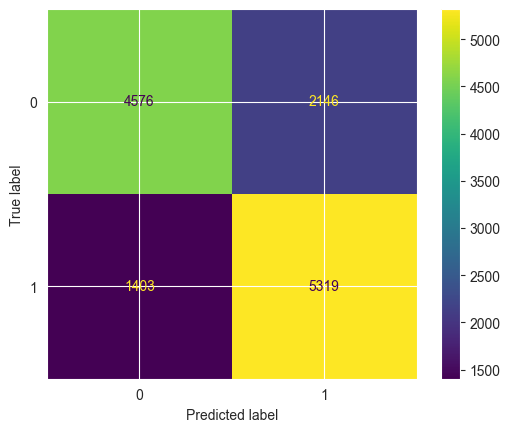

In [20]:
ConfusionMatrixDisplay.from_estimator(lr, X_train, y_train)

In [21]:
# Hyperparameter optimization for Decision Tree Classifier
parameters = {
    'max_depth':[3, 4, 5, 6, 10, 15,20,30],
}
dtc = Pipeline([('CV',GridSearchCV(DecisionTreeClassifier(), parameters, cv = 5))])
dtc.fit(X_train, y_train)
dtc.named_steps['CV'].best_params_

{'max_depth': 30}

In [22]:
%%time
# Decision Tree Classifier
dt = DecisionTreeClassifier(max_depth=30).fit(X_train, y_train)
dt_scores = cross_val_score(dt, X_train, y_train, cv=10, scoring="f1")
np.mean(dt_scores)

CPU times: total: 219 ms
Wall time: 4.17 s


0.9792147244995263

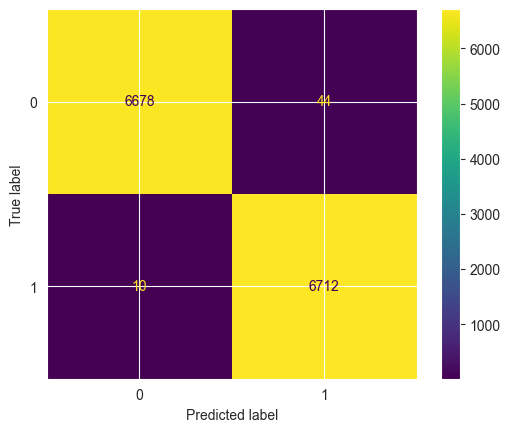

In [23]:
ConfusionMatrixDisplay.from_estimator(dt, X_train, y_train)

In [24]:
%%time
# Hyperparameter optimization of RandomForestClassifier
parameters = {
    'max_depth':[3, 6,12,15,20],
    'n_estimators':[10, 20,30]
}
clf = Pipeline([('CV',GridSearchCV(RandomForestClassifier(), parameters, cv = 5))])
clf.fit(X_train, y_train)
clf.named_steps['CV'].best_params_

CPU times: total: 3.64 s
Wall time: 54.5 s


{'max_depth': 20, 'n_estimators': 30}

In [26]:
%%time
# RandomForestClassifier
rf = Pipeline([('rf', RandomForestClassifier(n_estimators = 10, max_depth = 20).fit(X_train, y_train))])
rf_scores = cross_val_score(rf, X_train, y_train, cv=10, scoring="f1")
np.mean(rf_scores)

CPU times: total: 422 ms
Wall time: 6.6 s


0.9854000781683852

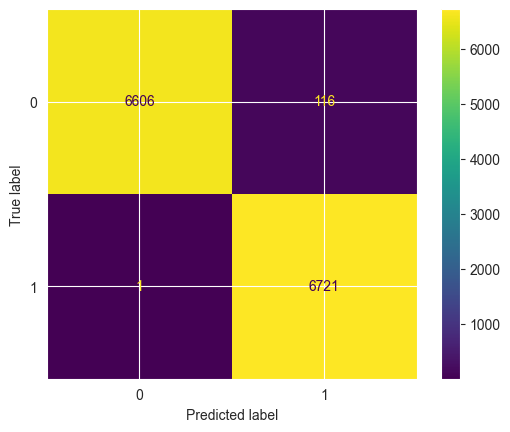

In [27]:
ConfusionMatrixDisplay.from_estimator(rf, X_train, y_train)